# LABORATORIO 3 - Práctica 1: Olimpiadas Tokio
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

# Introducción
---


La predicción del rendimiento de los atletas en los Juegos Olímpicos es un tema fascinante que ha atraído la atención de expertos en aprendizaje automático en todo el mundo. En este proyecto, se utiliza el conjunto de datos "Juegos olímpicos" para predecir la medalla de oro, plata o bronce que ganará un atleta español en los Juegos Olímpicos de Tokio de 2020, en función de su género, edad, altura y peso. Para lograr esto, se utiliza un clasificador de tipo KNN que se adapta mejor a los datos y se ajusta mediante distintas configuraciones de las dos métricas principales: el número de individuos utilizados para clasificar una nueva instancia y cómo se mide la cercanía de esa instancia con el resto.

Antes de aplicar el clasificador, se realiza un preprocesamiento de los datos para crear un conjunto de entrenamiento y otro de validación que permita clasificar a los atletas con las características necesarias. Se eliminan las características innecesarias y se reescala el conjunto de datos para normalizar las variables. Luego, se dividen los datos en dos conjuntos para poder entrenar el modelo y evaluar su precisión.

Finalmente, se utiliza el clasificador para predecir la medalla más probable que ganarán tres atletas españoles: Bruno Hortelano en atletismo, Carolina Marín en bádminton y la selección femenina de baloncesto. Los resultados obtenidos son presentados en una tabla para mostrar cómo evoluciona la clasificación a medida que se varían las configuraciones de las métricas y cómo se comportan las configuraciones elegidas como las mejores.

Es necesario destacar que se debe instalar la libreria "prettytable", haciendo uso del comando pip install "prettytable"

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix
from tabulate import tabulate



## Apartado 1: Preprocesamiento
---

Comenzamos importando el csv en un dataset.
- Posteriormente, eliminamos los datos que contengan algún valor nulo o repetido, pues suponen ruido en nuestro análisis.

- A continuación nos creamos nuestros dataset de validación y entrenamiento con las variables 'Sex', 'Age', 'Height', 'Weight' y 'Medal' que son las pedidas, añadiendo las varaibles 'Sport' y  'Team', consideramos que son variables importantes y que dado que al ser cualitativas es necesario codificarlas, se puede realizar sin tener valores exagerados de codificación que provoquen una gran carga computacional. No añadimos más, pues son variables categóricas, de manera que deberíamos realizar una codificación para poder ser clasificado, para evitar una alta complejidad computacional utilizamos solo esta variable

- Debemos pasar las variables categóricas a numéricas para poder realizar una clasificación correcta, de manera que debemos pasar la variable sexo a una codificación binaria donde 1 será hombre y 0 mujer.

- Del mismo modo debemos realizar una codificación de las variables categorías, Deporte y Equipo que hemos añadido al clasificador, para realizar esto asignamos a cada equipo y a cada deporte un número empezando desde el 1, para posteriormente realizar la conversión en el dataset final, en el proceso mostramos las tablas de codificación de cada variable para indicar como es la codificación.

- Por ultimo printamos como quedaria el dataset con las variables codificadas

In [8]:
# Importamos el dataset de los Juegos Olímpicos
Dataset_Juegos = pd.read_csv("../LAB03-GRUPO_2/Recursos Lab3/Recursos Lab3/olimpiadas.csv/olimpiadas.csv")

# Eliminamos los registros que contengan algún valor nulo o repetido en el dataset
Dataset_Juegos.dropna(inplace=True)
Dataset_Juegos.drop_duplicates()

# Codificamos las variables deporte y país para pasarlas de categóricas a numéricas
deportes = Dataset_Juegos['Sport'].unique()
paises = Dataset_Juegos['Team'].unique()

deportes_codificados = {deporte: i for i, deporte in enumerate(deportes)}
paises_codificados = {pais: i for i, pais in enumerate(paises)}

# Reemplazamos los valores de la columna 'Sport' y 'Team' con su codificación numérica
Dataset_Juegos['Sport'] = Dataset_Juegos['Sport'].replace(deportes_codificados)
Dataset_Juegos['Team'] = Dataset_Juegos['Team'].replace(paises_codificados)

# Creamos diccionarios para la tabla de codificación de los deportes y los países
deportes_dict = {v: k for k, v in deportes_codificados.items()}

table = PrettyTable()

table.field_names = ["Deporte", "Código"]

# Mostramos la tabla de codificación de los deportes
for deporte, codigo in deportes_dict.items():
    table.add_row([deporte, codigo])

print(table)

paises_dict = {v: k for k, v in paises_codificados.items()}

table1 = PrettyTable()

table1.field_names = ["País", "Código"]

# Mostramos la tabla de codificación de los países
for pais, codigo in paises_dict.items():
    table1.add_row([pais, codigo])

print(table1)

# Codificamos la variable 'Sex' como binaria, siendo 1 si es hombre y 0 si es mujer
Dataset_Juegos['Sex'] = Dataset_Juegos['Sex'].replace({'F': 0, 'M': 1})

# Seleccionamos las variables de interés, incluyendo 'Sport' y 'Team'
Dataset_Juegos_Final = Dataset_Juegos[['Sex', 'Age', 'Height', 'Weight','Sport','Team']]

# Creamos el conjunto de entrenamiento y validación y sus respectivas variables objetivo
objetivo = Dataset_Juegos['Medal']
Dataset_Juegos_Entrenamiento, Dataset_Juegos_Validacion, objetivo_entrenamiento, objetivo_validacion = train_test_split(Dataset_Juegos_Final, objetivo, test_size=0.2, random_state=42)

# Imprimimos las primeras 20 filas del conjunto de validación
Dataset_Juegos_Validacion.head(20)

+---------+---------------------------+
| Deporte |           Código          |
+---------+---------------------------+
|    0    |         Ice Hockey        |
|    1    |         Gymnastics        |
|    2    |       Alpine Skiing       |
|    3    |           Rowing          |
|    4    |          Football         |
|    5    |          Fencing          |
|    6    |         Taekwondo         |
|    7    |         Athletics         |
|    8    |          Canoeing         |
|    9    |          Handball         |
|    10   |         Water Polo        |
|    11   |         Wrestling         |
|    12   |          Sailing          |
|    13   |          Cycling          |
|    14   |           Hockey          |
|    15   |       Figure Skating      |
|    16   |          Softball         |
|    17   |          Swimming         |
|    18   |           Boxing          |
|    19   |         Basketball        |
|    20   |      Nordic Combined      |
|    21   |           Diving          |


,Sex,Age,Height,Weight,Sport,Team
144006,1,24.0,181.0,68.0,20,1
107822,0,25.0,153.0,51.0,29,80
203326,1,34.0,183.0,79.0,28,10
103866,0,26.0,174.0,64.0,7,6
232053,1,38.0,182.0,80.0,40,73
14874,1,25.0,188.0,120.0,11,6
52742,0,18.0,183.0,67.0,17,2
154188,1,20.0,165.0,51.0,18,10
226108,1,22.0,206.0,109.0,19,10
178133,0,25.0,190.0,75.0,19,10


## Apartado 2: 

---

El algoritmo de K-vecinos más cercanos (KNN) es un método de clasificación supervisada que utiliza la cercanía en el espacio de características entre una instancia nueva y el conjunto de datos para predecir su etiqueta de clase. Las dos métricas principales que debemos considerar para utilizar el algoritmo son el número de vecinos cercanos (K) y la métrica de distancia utilizada para medir la cercanía entre la nueva instancia y el resto del conjunto de datos.

El parámetro K indica el número de vecinos más cercanos que se utilizarán para clasificar la nueva instancia. Si K es pequeño, la predicción puede ser inestable y estar influenciada por el ruido en los datos. Por otro lado, si K es grande, puede haber una mayor generalización, pero la región de decisión puede ser demasiado amplia y la precisión puede disminuir. Por lo tanto, es importante encontrar el valor adecuado para K que proporcione una buena precisión de clasificación en nuevos datos.

La métrica de distancia utilizada para medir la cercanía entre la nueva instancia y el resto del conjunto de datos también es crucial en el algoritmo KNN. 

La distancia euclidiana es la métrica de distancia más comúnmente utilizada, que mide la distancia en línea recta entre dos puntos en un espacio n-dimensional. Sin embargo, hay otras métricas de distancia que también se pueden utilizar, como la distancia de Manhattan, la distancia de Chebyshev, la distancia de Minkowski, entre otras. En este caso usaremos la vista en clase siendo la Manhattan 

Para obtener el mejor rendimiento del algoritmo KNN, probamos con diferentes configuraciones de las dos métricas principales: el número de vecinos cercanos y la métrica de distancia. Al realizar pruebas, se puede seleccionamos la configuración óptima que proporcione la mayor precisión de clasificación en nuevos datos.



Para probar las distintas configuraciones posibles utilizamos un bucle anidado en el que se prueban distintas combinaciones de valores para las dos métricas principales del algoritmo KNN: el número de vecinos cercanos y la métrica de distancia utilizada para medir la cercanía entre la nueva instancia y el resto del conjunto de datos.

Dentro de este bucle, se crea un modelo KNN con la configuración actual, se entrena con los datos de entrenamiento y se realizan predicciones con los datos de validación. Luego se calcula la precisión de las predicciones utilizando la función accuracy_score() de la librería sklearn.

Finalmente, se guardan la configuración actual y la precisión en dos listas diferentes, y se crea una tabla de resultados utilizando la librería pandas. La tabla muestra todas las combinaciones de configuraciones probadas y su precisión correspondiente, ordenadas en orden descendente de precisión.

In [3]:
#probar diferentes configuraciones de métricas
configuraciones = []
precisiones = []

for n_vecinos in range(1,8):
    for distancia in ['euclidean', 'manhattan']:
        # crear el modelo KNN con la configuración actual
        modelo = KNeighborsClassifier(n_neighbors=n_vecinos, metric=distancia)

        # entrenar el modelo con los datos de entrenamiento
        modelo.fit(Dataset_Juegos_Entrenamiento, objetivo_entrenamiento)

        # hacer predicciones con los datos de validación
        predicciones = modelo.predict(Dataset_Juegos_Validacion)

        # calcular la precisión de las predicciones
        precision = accuracy_score(objetivo_validacion, predicciones)

        # guardar la configuración actual y la precisión
        configuraciones.append(f"K={n_vecinos}, distancia={distancia}")
        precisiones.append(precision)

# crear una tabla de resultados
resultados = pd.DataFrame({'Configuración': configuraciones, 'Precisión': precisiones})

# ordenar la tabla por precisión descendente
resultados = resultados.sort_values(by='Precisión', ascending=False).reset_index(drop=True)

c:\Users\kinde\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\kinde\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Apartado 3: 

---

Una vez entrenada la red con diversas configuraciones y con diversas distancia printamos los resultados y nos quedamos con las 3 mejores configuraciones. 

In [4]:
# crear la tabla de resultados
tabla_resultados = []
for i, config in enumerate(configuraciones):
    tabla_resultados.append([i+1, config, precisiones[i]])

# imprimir la tabla con formato
print(tabulate(tabla_resultados, headers=['Posicion', 'Configuración', 'Precisión'], tablefmt='fancy_grid'))


╒════════════╤══════════════════════════╤═════════════╕
│   Posicion │ Configuración            │   Precisión │
╞════════════╪══════════════════════════╪═════════════╡
│          1 │ K=1, distancia=euclidean │    0.414279 │
├────────────┼──────────────────────────┼─────────────┤
│          2 │ K=1, distancia=manhattan │    0.430843 │
├────────────┼──────────────────────────┼─────────────┤
│          3 │ K=2, distancia=euclidean │    0.42107  │
├────────────┼──────────────────────────┼─────────────┤
│          4 │ K=2, distancia=manhattan │    0.436972 │
├────────────┼──────────────────────────┼─────────────┤
│          5 │ K=3, distancia=euclidean │    0.413119 │
├────────────┼──────────────────────────┼─────────────┤
│          6 │ K=3, distancia=manhattan │    0.434984 │
├────────────┼──────────────────────────┼─────────────┤
│          7 │ K=4, distancia=euclidean │    0.417095 │
├────────────┼──────────────────────────┼─────────────┤
│          8 │ K=4, distancia=manhattan │    0.4

De acorde a la tabla las mejores medidas son:
- K=1, distancia=manhattan
- K=4, distancia=manhattan
- K=7, distancia=manhattan

Al mismo tiempo dibujamos un diagrama para facilitar la visualizacón de las mejores medidas

K=1, distancia=manhattan 0.4308431340069571
K=4, distancia=manhattan 0.44011926453536526
K=7, distancia=manhattan 0.4382971674672851


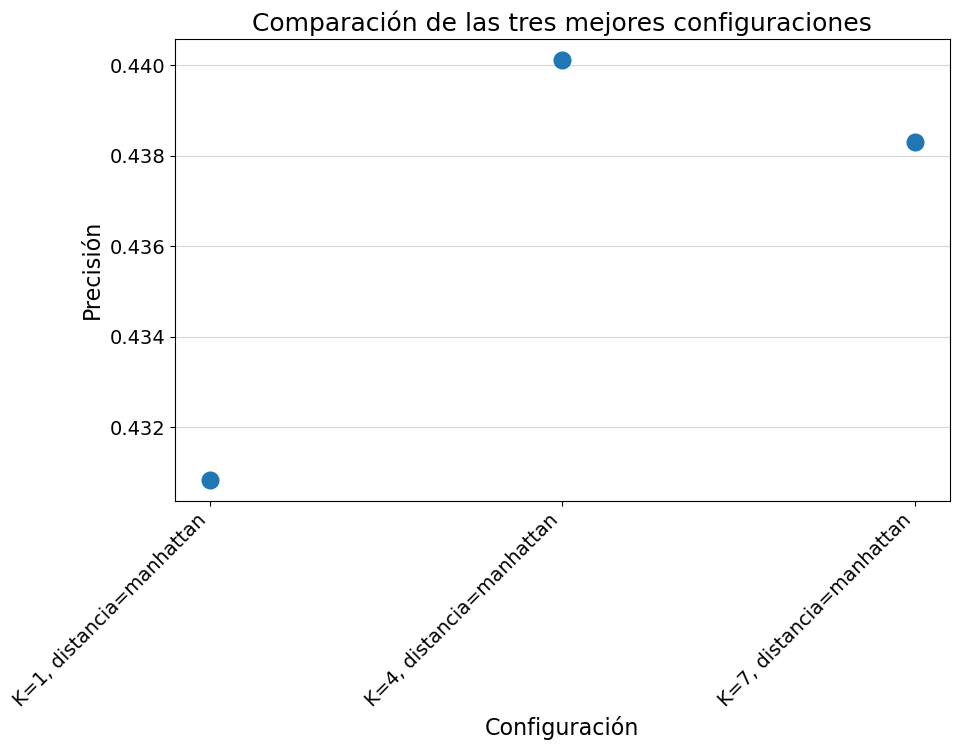

In [11]:
# Configuraciones
config1_nombre = tabla_resultados[1][1]
config1_precision = tabla_resultados[1][2]

config2_nombre = tabla_resultados[7][1]
config2_precision = tabla_resultados[7][2]

config3_nombre = tabla_resultados[13][1]
config3_precision = tabla_resultados[13][2]

print(config1_nombre,config1_precision)
print(config2_nombre,config2_precision)
print(config3_nombre,config3_precision)


# Precisión
precisiones = [config1_precision, config2_precision, config3_precision]

# Crear gráfico de puntos
plt.figure(figsize=(10,6))
plt.plot([1,2,3], precisiones, 'o', markersize=12)
plt.xticks([1,2,3], [config1_nombre, config2_nombre, config3_nombre], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Configuración', fontsize=16)
plt.ylabel('Precisión', fontsize=16)
plt.title('Comparación de las tres mejores configuraciones', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Agregar grid
plt.grid(axis='y', alpha=0.5)

# Mostrar gráfico
plt.show()

## Apartado 4: 

---

- Una vez entrenado el modelo y observado cual es la mejor clasificación decidimos observar donde clasificar a estas personas: 'Bruno Hortelano' y 'Carolina Marín' en funcion de sus habilidades

- Ambas personas 'Bruno Hortelano' y 'Carolina Marín' no se encuentran presentes en el datasaet de olimpidas, de manera que debemos obtener sus datos de internet aqui citamos de donde se ha obtenido la inormación:

Bruno Hortelano : colaboradores de Wikipedia. (2023). Bruno Hortelano. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Bruno_Hortelano
Carolina_Marin  : colaboradores de Wikipedia. (2023b). Carolina Marín. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Carolina_Mar%C3%ADn

In [6]:
# Filtrar las filas correspondientes a los atletas en cuestión
# Crear un array 2D con las características de Bruno Hortelano
Bruno_Hortelano = np.array([[1, 31, 181, 72, 55, 4]])
Carolina_Marin = np.array([[0, 29, 172, 65, 10, 4]])

# Seleccionar características necesarias para la clasificación
columnas = ['Sex', 'Age', 'Height', 'Weight','Sport','Team']

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(Dataset_Juegos[columnas])

# Ajustar el clasificador con los datos de entrenamiento
y = Dataset_Juegos['Medal']
modelo.fit(X, y)

# Realizar la predicción para Bruno Hortelano
X_bh = scaler.transform(Bruno_Hortelano)
y_pbh = modelo.predict(X_bh)

# Realizar la predicción para Bruno Hortelano
X_cm = scaler.transform(Carolina_Marin)
y_pcm  = modelo.predict(X_cm)

print("La medalla más probable que ganará Bruno Hortelano es:", y_pbh)
print("La medalla más probable que ganará Carolina Marin es:", y_pcm)

La medalla más probable que ganará Bruno Hortelano es: ['Gold']
La medalla más probable que ganará Carolina Marin es: ['Gold']


c:\Users\kinde\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\kinde\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\kinde\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\kinde\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWar

En este caso, el modelo ha predicho que tanto Bruno Hortelano como Carolina Marin tienen la mayor probabilidad de ganar una medalla de oro. Esto sugiere que ambos atletas están en una buena posición para obtener un buen resultado en los Juegos Olímpicos, al menos en comparación con otros atletas en el mismo conjunto de datos.